# House Price Preiction - ML - Using 8 regression Models



In [11]:
# As target variable is Continuos value = use Regression
# if target variable is classes = use Classification

## Import All Libraries



In [12]:
import numpy as np # For data manipulation
import pandas as pd # For data manipulation
import seaborn as sns # For data visualizaion
import matplotlib.pyplot as plt # For data visualizaion

## Load Dataset


In [13]:
df = pd.read_csv('/content/Housing.csv')
df.head()
#Price = Target variable
#Supervised learning data = Labeled data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
df.shape

(545, 13)

In [15]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [16]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [17]:
df.info() #Check non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [18]:
df.duplicated().any() #Check dupliactes

False

In [19]:
df.isnull().any() #Check Null values

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [20]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [21]:
# seperate catergorical and numerical columns

cat = df.select_dtypes(include='object').columns
cat

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [22]:
num = df.select_dtypes(exclude='object').columns
num

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [23]:
df.describe() #Check statistical summary / data

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [24]:
df[df['price'] == df['price'].max()] #Check highest Price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


In [25]:
df[df['area'] == df['area'].max()] #check highest area.. price is less because its Unfurnished House

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [26]:
for col in cat:
  print(df[col].value_counts())
  print(' --------')


yes    468
no      77
Name: mainroad, dtype: int64
 --------
no     448
yes     97
Name: guestroom, dtype: int64
 --------
no     354
yes    191
Name: basement, dtype: int64
 --------
no     520
yes     25
Name: hotwaterheating, dtype: int64
 --------
no     373
yes    172
Name: airconditioning, dtype: int64
 --------
no     417
yes    128
Name: prefarea, dtype: int64
 --------
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64
 --------


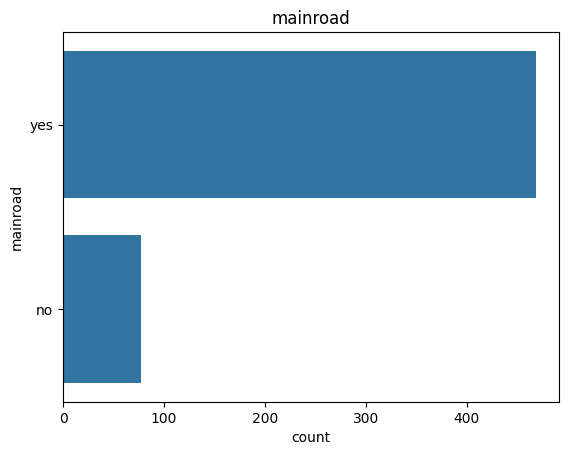

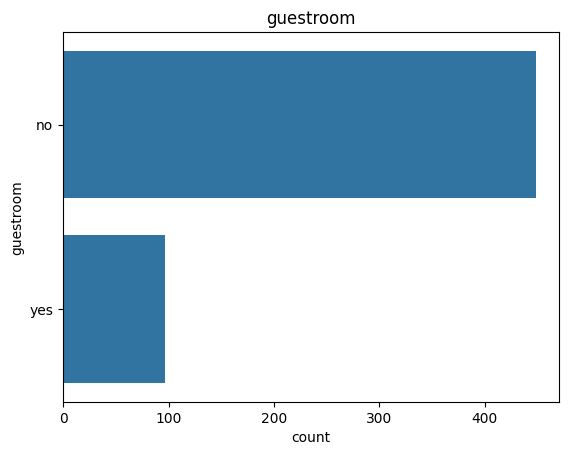

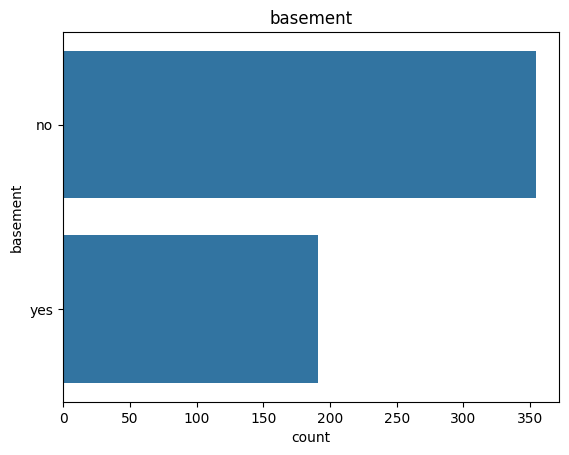

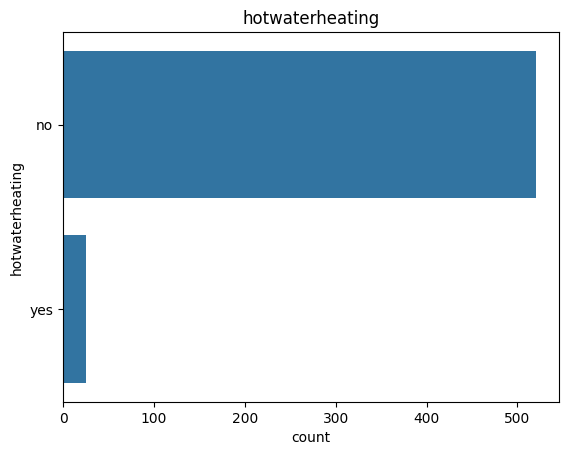

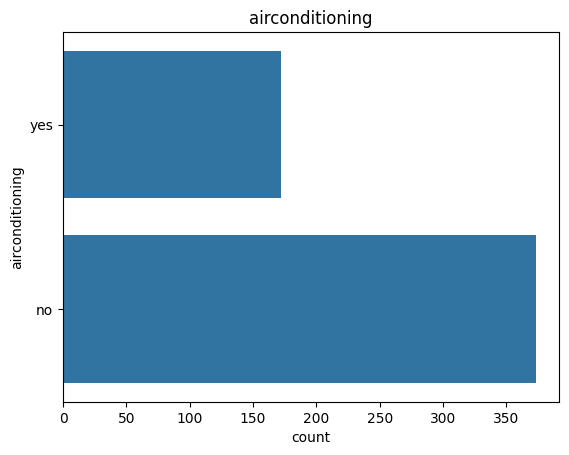

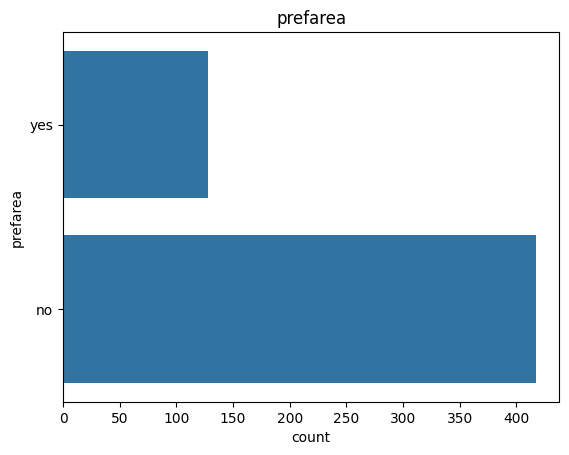

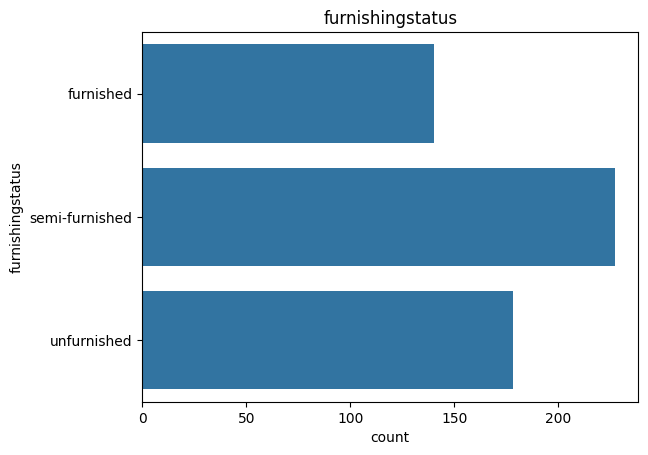

In [27]:
for col in cat:
  sns.countplot(df[col])
  plt.title(col)
  plt.show()

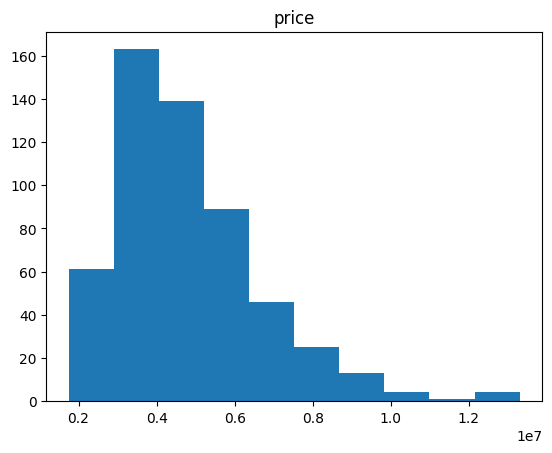

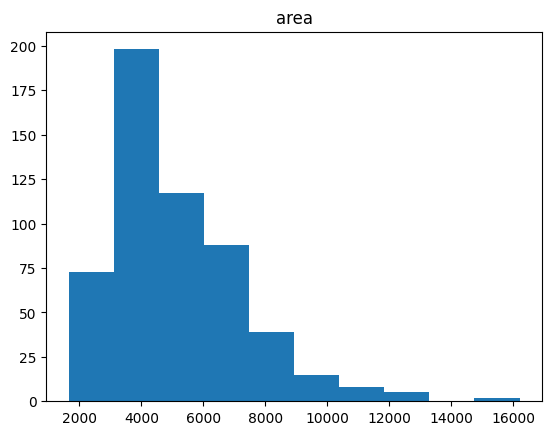

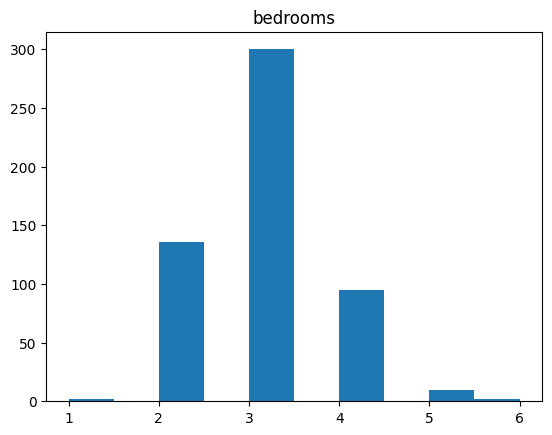

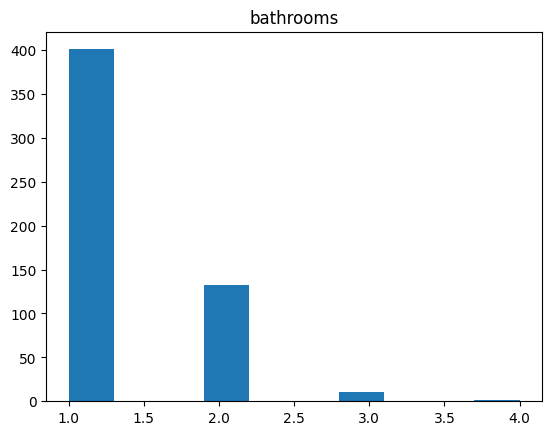

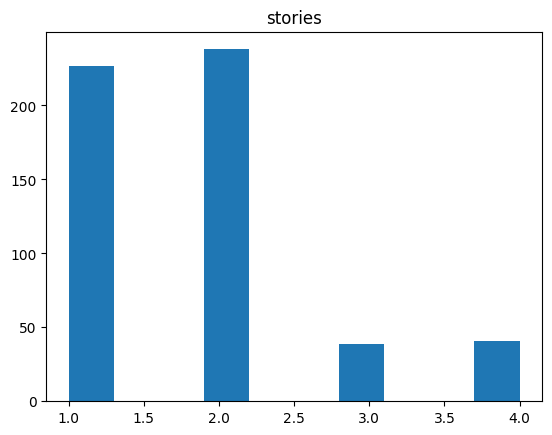

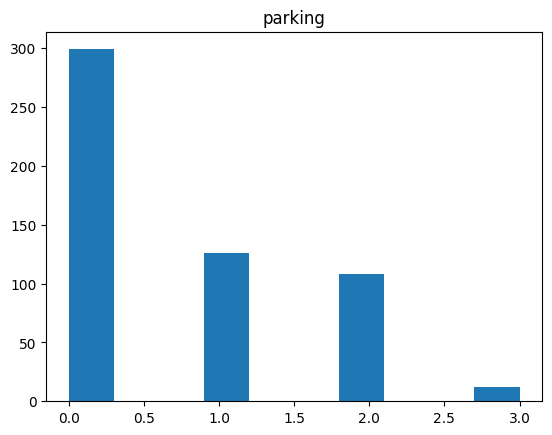

In [28]:
for n in num:
  plt.hist(df[n])
  plt.title(n)
  plt.show()

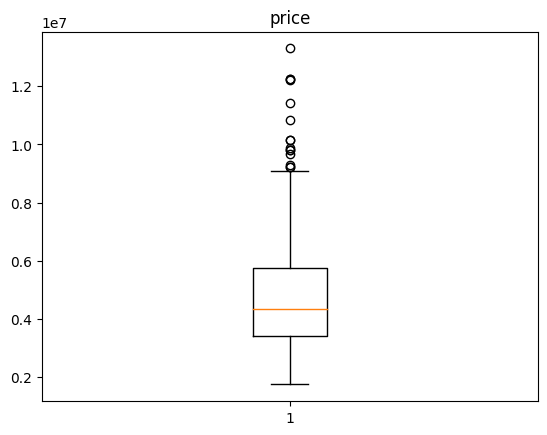

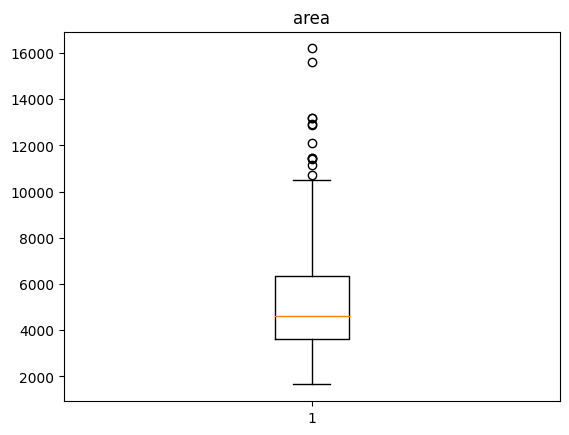

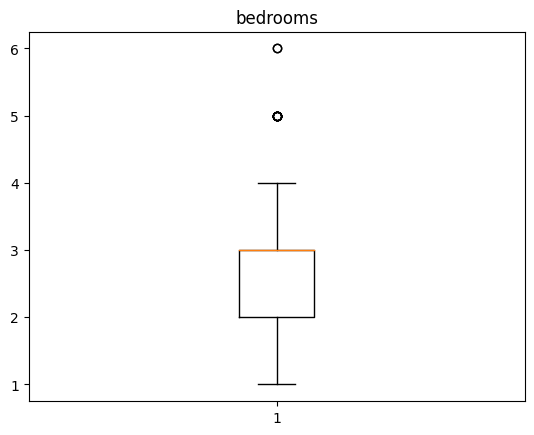

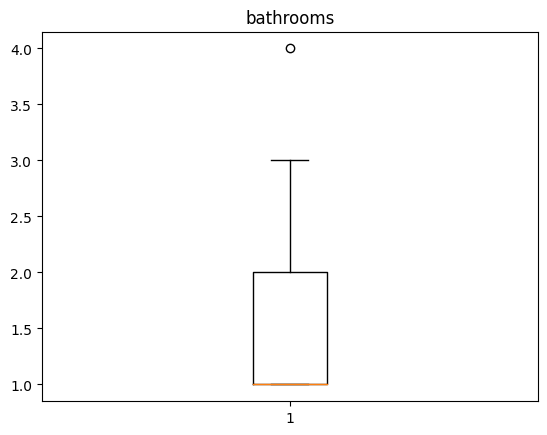

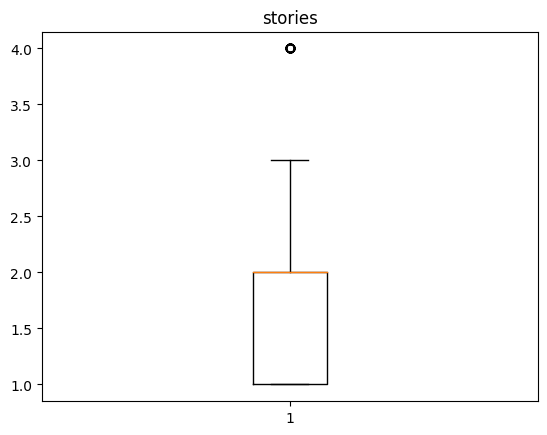

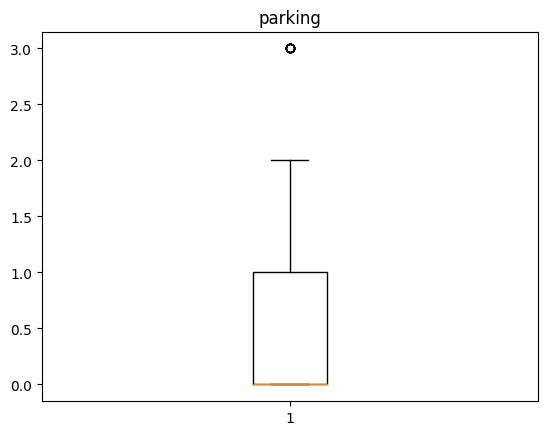

In [29]:
for n in num:
  plt.boxplot(df[n])
  plt.title(n)
  plt.show()

In [30]:
corr_matrix = df[num].corr() #Check correlation with Price(Target)
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

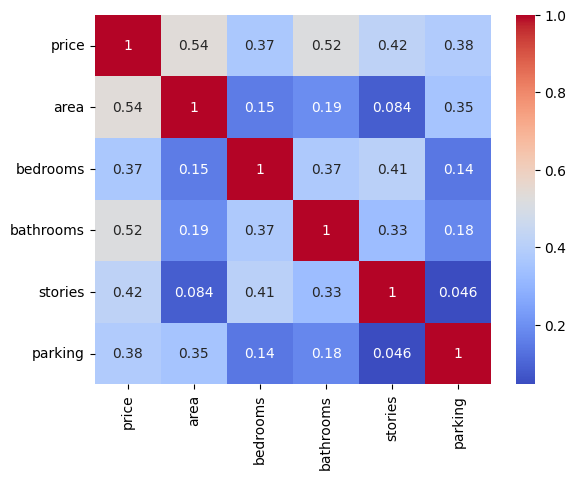

In [31]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

<Axes: xlabel='price', ylabel='area'>

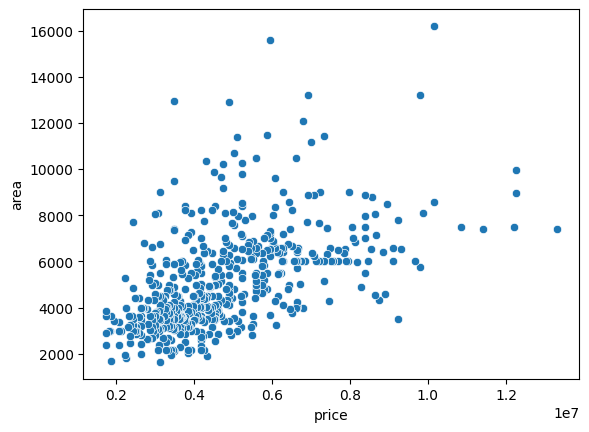

In [32]:
sns.scatterplot(x=df['price'],y=df['area'])

## Splitting data - Target & Predictors

In [33]:
X = df.drop('price',axis = 1)
y = df['price']

## Feature Engineering
### To convert Categorical data into Numerical

*   Label Encoding
*   Feature Scaling



In [34]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [35]:
#for col in cat:
#  print(col)
#  X[col] = le.fit_transform(X[col])

In [36]:
cat


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [37]:
x1 = df.drop('price',axis=1)
x1.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea']
for col in cols:
  x1[col] = x1[col].apply(lambda x:1 if x=='yes' else 0)
x1.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [39]:
x1.furnishingstatus.head()

0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
Name: furnishingstatus, dtype: object

In [40]:
def furnished(x):
  if x == 'furnished':
    return 2
  elif x == 'semi-furnished':
    return 1
  else:
    return 0

x1['furnishingstatus'] = x1['furnishingstatus'].apply(lambda x:furnished(x))
x1.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


### Feature Scaling

In [41]:
# Need to scale data on same scale for Linear Regresion

In [42]:
feature_to_scale = ['area','bedrooms','bathrooms','stories','parking']

from sklearn.preprocessing import StandardScaler #For normally distributed data
sc= StandardScaler()

In [43]:
from sklearn.preprocessing import MinMaxScaler #Fpr Screwd data
ms= MinMaxScaler()

In [44]:
for col in feature_to_scale:
  print(col)
  x1[[col]] = ms.fit_transform(x1[[col]])

area
bedrooms
bathrooms
stories
parking


In [45]:
x1.head() #Scaled data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,2
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,2
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,2
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,2


## Split data for Trainning and Testing

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [47]:
x_train.shape, x_test.shape

((436, 12), (109, 12))

In [48]:
x1.shape #80% for train + 20% for test

(545, 12)

## Model Developement

In [49]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [52]:
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [59]:
score = round(r2_score(y_test, y_pred_lr)*100,2)
mse = round(mean_squared_error(y_test, y_pred_lr)*100,2)

In [62]:
print('Linear Regression Model :')
print('R2 score is', score, '%')
print('Mean Squarred Error is', mse)

Linear Regression Model :
R2 score is 64.95 %
Mean Squarred Error is 177175111659404.22


In [61]:
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dt = DecisionTreeRegressor()
et = ExtraTreesRegressor()
rf = RandomForestRegressor()
kn = KNeighborsRegressor()
sv = SVR()

In [66]:
model_list = [lr,ls,rd,dt,et,rf,kn,sv]

In [78]:
for model in model_list:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  score = round(r2_score(y_test, y_pred)*100,2)
  mse = round(mean_squared_error(y_test, y_pred)*100,2)
  print(f"----{model.__class__.__name__}---")
  print('R2 score is', score, '%')
  print('Mean Squarred Error is', mse)
  print('******-------******')

----LinearRegression---
R2 score is 64.95 %
Mean Squarred Error is 177175111659404.22
******-------******
----Lasso---
R2 score is 64.95 %
Mean Squarred Error is 177175718625113.5
******-------******
----Ridge---
R2 score is 64.88 %
Mean Squarred Error is 177493952646726.22
******-------******
----DecisionTreeRegressor---
R2 score is 42.69 %
Mean Squarred Error is 289668725917431.2
******-------******
----ExtraTreesRegressor---
R2 score is 61.55 %
Mean Squarred Error is 194350976703016.72
******-------******
----RandomForestRegressor---
R2 score is 61.97 %
Mean Squarred Error is 192218216420937.7
******-------******
----KNeighborsRegressor---
R2 score is 50.1 %
Mean Squarred Error is 252243663715412.84
******-------******
----SVR---
R2 score is -10.16 %
Mean Squarred Error is 556794142558693.8
******-------******


In [79]:
from sklearn.model_selection import cross_val_score

models = [lr,ls,rd,dt,et,rf,kn,sv]
features = x_train
labels = y_train
CV = 5 #Cross Val generates 5 accuracies and we will take mean of it.
accuracy_list = []
model_name = []

In [82]:
for model in models:
  model_name1 = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='r2', cv= CV)
  accuracy_list.append(accuracies.mean()*100)
  model_name.append(model_name1)

In [84]:
model_acc_df = pd.DataFrame({'model':model_name,'Cross_val_score':accuracy_list})
model_acc_df

,model,Cross_val_score
0,LinearRegression,64.694529
1,Lasso,64.694567
2,Ridge,64.869945
3,DecisionTreeRegressor,17.307816
4,ExtraTreesRegressor,58.509263
5,RandomForestRegressor,60.177718
6,KNeighborsRegressor,47.157415
7,SVR,-6.493356


## Manual Predictive System : Linear Regression Model
### Linear Regression & Lasso Having Highest Cross_Val_Score

In [104]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
area = int(input('Enter the area of House:'))
ar1 = ms.fit_transform([[area]])[0][0]
bedroom = int(input('Enter the no of Bedrooms:'))
bd1 = ms.fit_transform([[bedroom]])[0][0]
bathroom = int(input('Enter the no of Bathrooms:'))
br1 = ms.fit_transform([[bathroom]])[0][0]
store = int(input('Enter the no of Stores:'))
st1 = ms.fit_transform([[store]])[0][0]
main_road = int(input('is main road available:')) # yes = 1 , No = 0
guest_room = int(input('is guest room available:'))
basement = int(input('is basement available:'))
hot_water = int(input('is hot water available:'))
AC = int(input('is AC available:'))
parking = int(input('Enter the number of parking:'))
pk1 = ms.fit_transform([[parking]])[0][0]
pref_area = int(input('Preferred area available:'))
furnish = int(input('Enter furnishing status:')) # 2 , 1 , 0

Enter the area of House:1200
Enter the no of Bedrooms:3
Enter the no of Bathrooms:2
Enter the no of Stores:2
is main road available:1
is guest room available:1
is basement available:1
is hot water available:1
is AC available:1
Enter the number of parking:2
Preferred area available:1
Enter furnishing status:2


In [98]:
house_data = (ar1,bd1,br1,st1,main_road,guest_room,basement,hot_water,AC,pk1,pref_area,furnish)
house_data_arr = np.array(house_data)
house_data_reshape = house_data_arr.reshape(1,-1)
house_price = lr.predict(house_data_reshape)
print('House price predicted by Linear Regression model is :',house_price[0])

House price predicted by Linear Regression model is : 5360612.75344279


## Save Model

In [88]:
import pickle as pk

In [90]:
filename = 'House_price_pred_1.sav'
pk.dump(lr, open(filename, 'wb')) #wb = write binary

## Load Model

In [91]:
load_model = pk.load(open(filename, 'rb')) #rb = read binary

In [105]:
house_data = (1200,2,2,3,1,1,1,1,1,2,1,2)
house_data_arr = np.array(house_data)
house_data_reshape = house_data_arr.reshape(1,-1)
house_price = load_model.predict(house_data_reshape)
print('House price predicted by saved model :',house_price[0])

House price predicted by saved model : 4135659164.25902


In [102]:
warnings.resetwarnings()